<a href="https://colab.research.google.com/github/FacuNieto/OpenROBi/blob/main/Robi_Arbol_CART.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1 Carga de dataset 1️⃣

In [ ]:
#importamos librerias numpy, pandas y matplot 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
#importamos algoritmo Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, ConfusionMatrixDisplay, classification_report
import joblib
from sklearn.preprocessing import MinMaxScaler
!pip install mplcyberpunk
plt.style.use('dark_background')
import mplcyberpunk


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#asociamos drive para carga de dataset
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
#Cargamos dataset y visualizamos en un dataframe
robi_df=pd.read_excel("/content/drive/MyDrive/5. Robi/Datasets Robi/DATASET_ROBI.xlsx")
display(robi_df)

,DeltMed,DeltFront,Biceps,Flex_Muñe,Flex_Dedos,Prona,can1raw,can2raw,can3raw,can4raw,can5raw,can6raw,Angulo,3 franjas,4 franjas
0,12.290716,549.105425,1092.563919,1634.054660,2173.394291,2704.079359,-3846.00,14671.28,3980.62,-4295.11,-874.40,-1232.27,28,0,0
1,24.412208,558.046100,1104.902734,1647.886006,2186.587757,2708.129126,-3442.57,13645.11,4065.02,-4412.86,-767.76,-2332.94,28,0,0
2,36.365329,566.823130,1117.017937,1661.495353,2199.581512,2712.149371,-2785.47,12551.20,4354.72,-3703.44,-1183.50,-2328.45,28,0,0
3,48.150933,575.437618,1128.911021,1674.884014,2212.376672,2716.140166,-2891.49,13116.50,4407.63,-3244.71,-1473.02,-1209.36,28,0,0
4,59.769874,583.890669,1140.583480,1688.053304,2224.974349,2720.101583,-3501.45,14298.05,4189.23,-3597.89,-1289.14,-685.89,28,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259896,15.475261,544.108699,1104.952133,1622.760387,2164.451207,2699.543156,-990.94,15384.24,2776.91,-4206.64,-2033.49,-2609.28,53,0,0
259897,12.460044,543.307759,1100.067524,1622.213285,2163.563738,2699.627167,-624.15,15927.56,2827.09,-2965.67,-2125.47,-2096.84,53,0,0
259898,9.405118,542.496479,1095.130236,1621.663695,2162.674863,2699.714840,-1603.00,17360.24,2658.49,-3315.41,-2045.34,-2238.39,53,0,0
259899,6.310274,541.674799,1090.140039,1621.111619,2161.784603,2699.806191,-2385.29,17829.45,2500.29,-4462.95,-1801.73,-2722.69,53,0,0


In [ ]:
robi_df.info() # verificar nulls
plt.style.use('dark_background')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 259901 entries, 0 to 259900
Data columns (total 15 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   DeltMed     259901 non-null  float64
 1   DeltFront   259901 non-null  float64
 2   Biceps      259901 non-null  float64
 3   Flex_Muñe   259901 non-null  float64
 4   Flex_Dedos  259901 non-null  float64
 5   Prona       259901 non-null  float64
 6   can1raw     259901 non-null  float64
 7   can2raw     259901 non-null  float64
 8   can3raw     259901 non-null  float64
 9   can4raw     259901 non-null  float64
 10  can5raw     259901 non-null  float64
 11  can6raw     259901 non-null  float64
 12  Angulo      259901 non-null  int64  
 13  3 franjas   259901 non-null  int64  
 14  4 franjas   259901 non-null  int64  
dtypes: float64(12), int64(3)
memory usage: 29.7 MB


In [ ]:
robi_df.groupby('3 franjas').count()

,DeltMed,DeltFront,Biceps,Flex_Muñe,Flex_Dedos,Prona,can1raw,can2raw,can3raw,can4raw,can5raw,can6raw,Angulo,4 franjas
3 franjas,,,,,,,,,,,,,,
0,111675,111675,111675,111675,111675,111675,111675,111675,111675,111675,111675,111675,111675,111675
1,60863,60863,60863,60863,60863,60863,60863,60863,60863,60863,60863,60863,60863,60863
2,87363,87363,87363,87363,87363,87363,87363,87363,87363,87363,87363,87363,87363,87363


In [ ]:
envolventes=robi_df[['DeltMed','DeltFront','Biceps','Flex_Muñe','Flex_Dedos','Prona']]
crudas=robi_df[['can1raw',	'can2raw',	'can3raw',	'can4raw',	'can5raw',	'can6raw']]
completo=robi_df.drop(['Angulo',	'3 franjas',	'4 franjas'], axis=1)
display(envolventes,crudas,completo)

,DeltMed,DeltFront,Biceps,Flex_Muñe,Flex_Dedos,Prona
0,12.290716,549.105425,1092.563919,1634.054660,2173.394291,2704.079359
1,24.412208,558.046100,1104.902734,1647.886006,2186.587757,2708.129126
2,36.365329,566.823130,1117.017937,1661.495353,2199.581512,2712.149371
3,48.150933,575.437618,1128.911021,1674.884014,2212.376672,2716.140166
4,59.769874,583.890669,1140.583480,1688.053304,2224.974349,2720.101583
...,...,...,...,...,...,...
259896,15.475261,544.108699,1104.952133,1622.760387,2164.451207,2699.543156
259897,12.460044,543.307759,1100.067524,1622.213285,2163.563738,2699.627167
259898,9.405118,542.496479,1095.130236,1621.663695,2162.674863,2699.714840
259899,6.310274,541.674799,1090.140039,1621.111619,2161.784603,2699.806191


,can1raw,can2raw,can3raw,can4raw,can5raw,can6raw
0,-3846.00,14671.28,3980.62,-4295.11,-874.40,-1232.27
1,-3442.57,13645.11,4065.02,-4412.86,-767.76,-2332.94
2,-2785.47,12551.20,4354.72,-3703.44,-1183.50,-2328.45
3,-2891.49,13116.50,4407.63,-3244.71,-1473.02,-1209.36
4,-3501.45,14298.05,4189.23,-3597.89,-1289.14,-685.89
...,...,...,...,...,...,...
259896,-990.94,15384.24,2776.91,-4206.64,-2033.49,-2609.28
259897,-624.15,15927.56,2827.09,-2965.67,-2125.47,-2096.84
259898,-1603.00,17360.24,2658.49,-3315.41,-2045.34,-2238.39
259899,-2385.29,17829.45,2500.29,-4462.95,-1801.73,-2722.69


,DeltMed,DeltFront,Biceps,Flex_Muñe,Flex_Dedos,Prona,can1raw,can2raw,can3raw,can4raw,can5raw,can6raw
0,12.290716,549.105425,1092.563919,1634.054660,2173.394291,2704.079359,-3846.00,14671.28,3980.62,-4295.11,-874.40,-1232.27
1,24.412208,558.046100,1104.902734,1647.886006,2186.587757,2708.129126,-3442.57,13645.11,4065.02,-4412.86,-767.76,-2332.94
2,36.365329,566.823130,1117.017937,1661.495353,2199.581512,2712.149371,-2785.47,12551.20,4354.72,-3703.44,-1183.50,-2328.45
3,48.150933,575.437618,1128.911021,1674.884014,2212.376672,2716.140166,-2891.49,13116.50,4407.63,-3244.71,-1473.02,-1209.36
4,59.769874,583.890669,1140.583480,1688.053304,2224.974349,2720.101583,-3501.45,14298.05,4189.23,-3597.89,-1289.14,-685.89
...,...,...,...,...,...,...,...,...,...,...,...,...
259896,15.475261,544.108699,1104.952133,1622.760387,2164.451207,2699.543156,-990.94,15384.24,2776.91,-4206.64,-2033.49,-2609.28
259897,12.460044,543.307759,1100.067524,1622.213285,2163.563738,2699.627167,-624.15,15927.56,2827.09,-2965.67,-2125.47,-2096.84
259898,9.405118,542.496479,1095.130236,1621.663695,2162.674863,2699.714840,-1603.00,17360.24,2658.49,-3315.41,-2045.34,-2238.39
259899,6.310274,541.674799,1090.140039,1621.111619,2161.784603,2699.806191,-2385.29,17829.45,2500.29,-4462.95,-1801.73,-2722.69


In [ ]:
# Aplicamos MinMaxScaler a la data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
print(scaler.fit(envolventes))
robi_df_escal_env=pd.DataFrame(scaler.transform(envolventes),
                           columns=envolventes.columns)
print(scaler.fit(crudas))
robi_df_escal_crudo=pd.DataFrame(scaler.transform(crudas),
                           columns=crudas.columns)
print(scaler.fit(completo))
robi_df_escal_completo=pd.DataFrame(scaler.transform(completo),
                           columns=completo.columns)
display(robi_df_escal_env,robi_df_escal_crudo,robi_df_escal_completo)

MinMaxScaler()
MinMaxScaler()
MinMaxScaler()


,DeltMed,DeltFront,Biceps,Flex_Muñe,Flex_Dedos,Prona
0,0.247748,0.208665,0.178718,0.164989,0.168876,0.171864
1,0.265351,0.232010,0.203682,0.187489,0.190010,0.182273
2,0.282709,0.254928,0.228194,0.209627,0.210825,0.192606
3,0.299825,0.277422,0.252256,0.231407,0.231322,0.202863
4,0.316698,0.299493,0.275873,0.252830,0.251502,0.213044
...,...,...,...,...,...,...
259896,0.252372,0.195618,0.203782,0.146616,0.154550,0.160205
259897,0.247994,0.193527,0.193899,0.145726,0.153128,0.160421
259898,0.243557,0.191409,0.183910,0.144832,0.151704,0.160646
259899,0.239063,0.189263,0.173814,0.143934,0.150278,0.160881


,can1raw,can2raw,can3raw,can4raw,can5raw,can6raw
0,0.259546,0.562185,0.635017,0.333882,0.749379,0.496714
1,0.296044,0.559331,0.642612,0.322341,0.782175,0.493779
2,0.355491,0.556289,0.668678,0.391876,0.654318,0.493791
3,0.345900,0.557861,0.673439,0.436839,0.565279,0.496775
4,0.290717,0.561147,0.653788,0.402221,0.621829,0.498171
...,...,...,...,...,...,...
259896,0.517842,0.564167,0.526709,0.342554,0.392911,0.493042
259897,0.551025,0.565678,0.531224,0.464190,0.364624,0.494408
259898,0.462469,0.569662,0.516054,0.429909,0.389267,0.494031
259899,0.391696,0.570967,0.501819,0.317431,0.464187,0.492740


,DeltMed,DeltFront,Biceps,Flex_Muñe,Flex_Dedos,Prona,can1raw,can2raw,can3raw,can4raw,can5raw,can6raw
0,0.247748,0.208665,0.178718,0.164989,0.168876,0.171864,0.259546,0.562185,0.635017,0.333882,0.749379,0.496714
1,0.265351,0.232010,0.203682,0.187489,0.190010,0.182273,0.296044,0.559331,0.642612,0.322341,0.782175,0.493779
2,0.282709,0.254928,0.228194,0.209627,0.210825,0.192606,0.355491,0.556289,0.668678,0.391876,0.654318,0.493791
3,0.299825,0.277422,0.252256,0.231407,0.231322,0.202863,0.345900,0.557861,0.673439,0.436839,0.565279,0.496775
4,0.316698,0.299493,0.275873,0.252830,0.251502,0.213044,0.290717,0.561147,0.653788,0.402221,0.621829,0.498171
...,...,...,...,...,...,...,...,...,...,...,...,...
259896,0.252372,0.195618,0.203782,0.146616,0.154550,0.160205,0.517842,0.564167,0.526709,0.342554,0.392911,0.493042
259897,0.247994,0.193527,0.193899,0.145726,0.153128,0.160421,0.551025,0.565678,0.531224,0.464190,0.364624,0.494408
259898,0.243557,0.191409,0.183910,0.144832,0.151704,0.160646,0.462469,0.569662,0.516054,0.429909,0.389267,0.494031
259899,0.239063,0.189263,0.173814,0.143934,0.150278,0.160881,0.391696,0.570967,0.501819,0.317431,0.464187,0.492740


Visualización

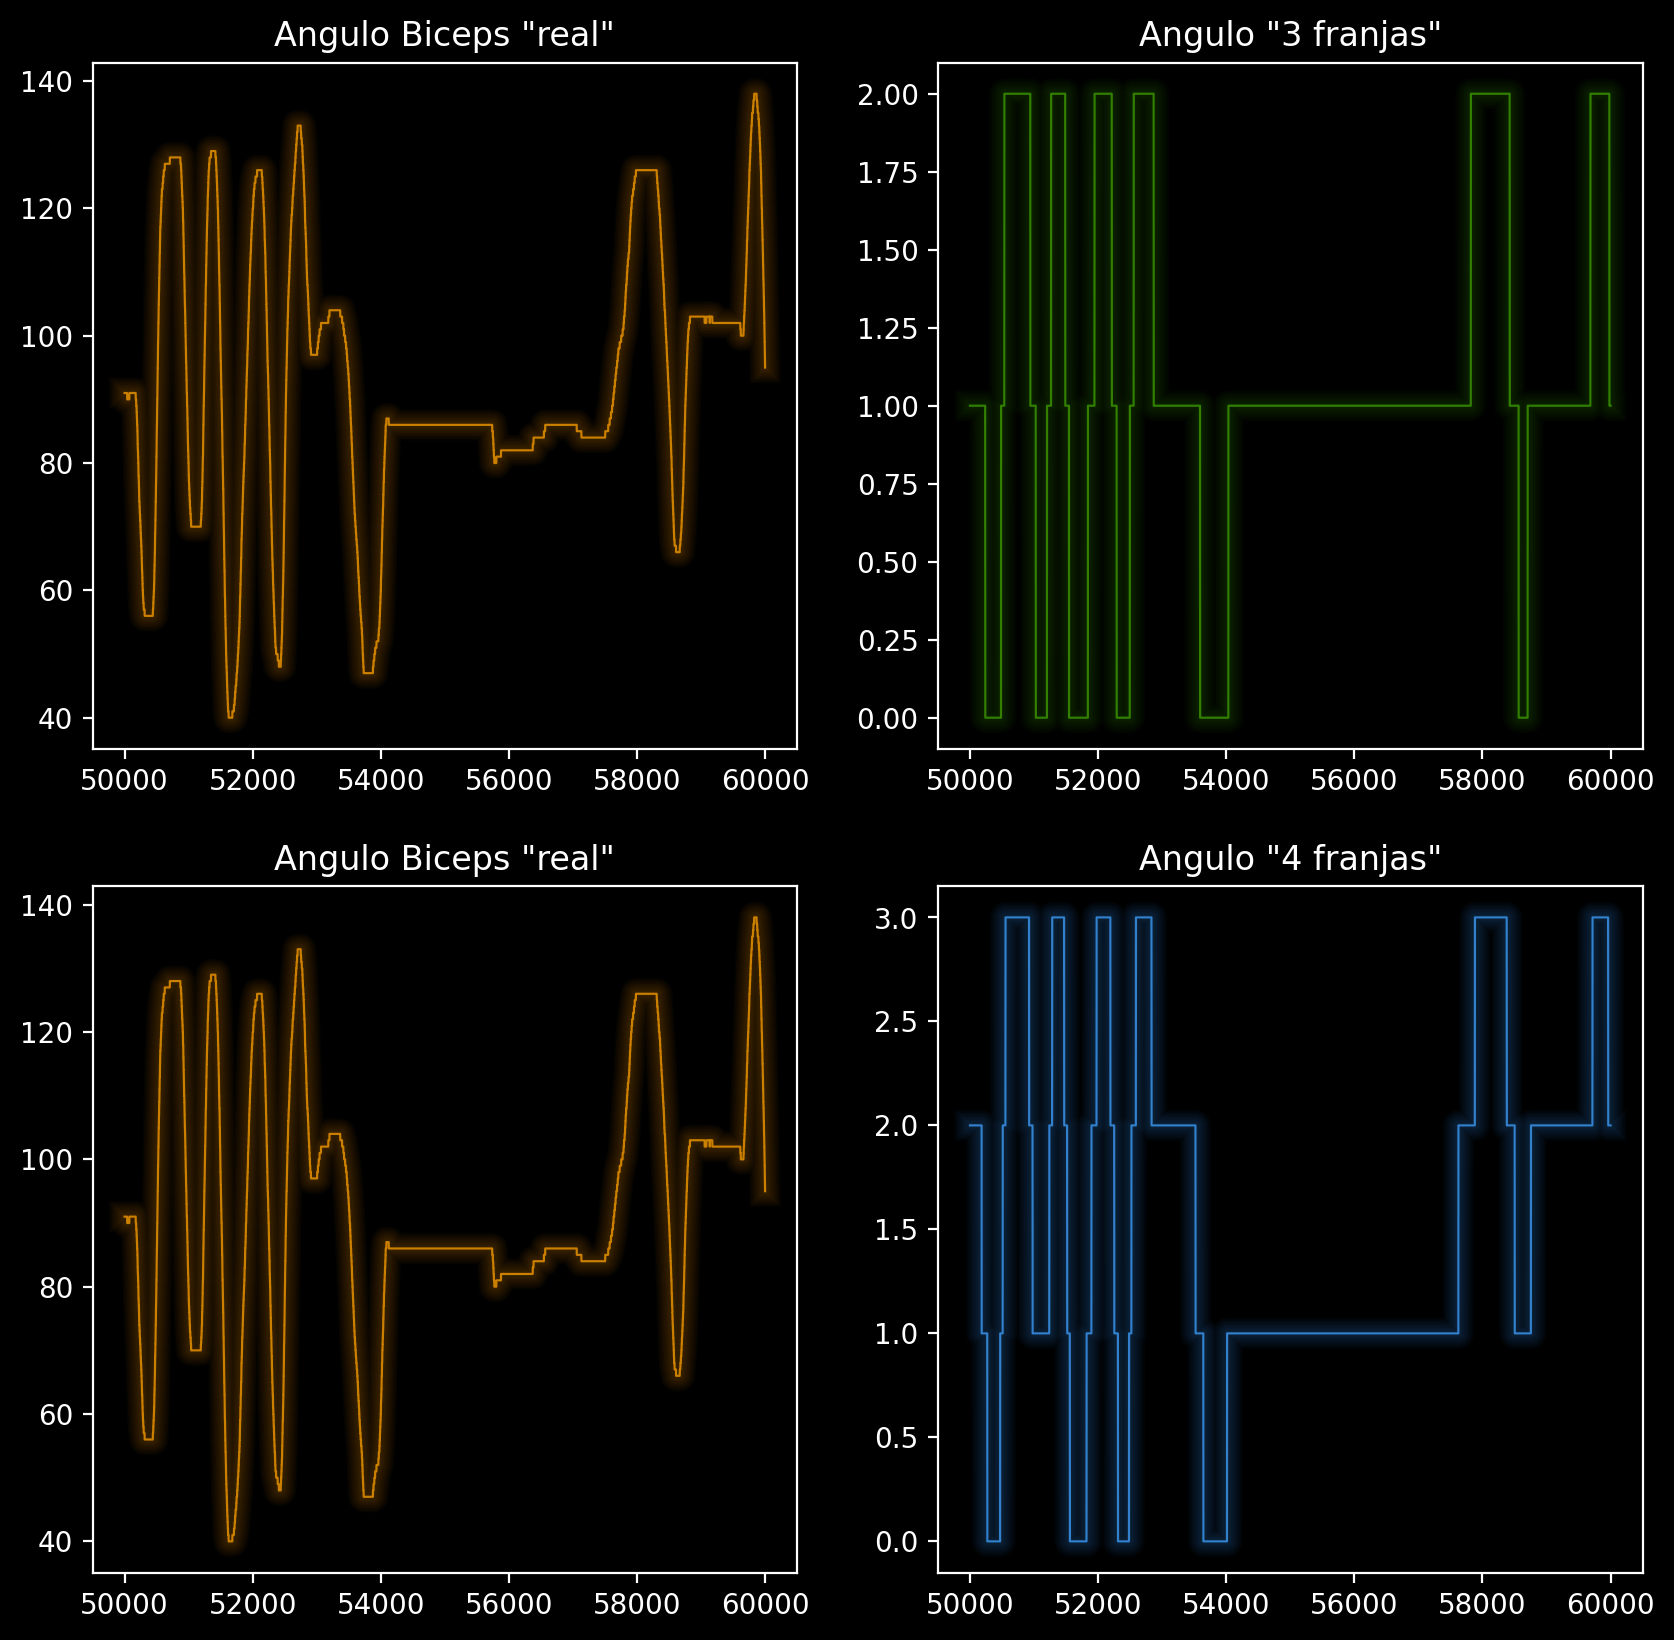

CPU times: user 926 ms, sys: 11.4 ms, total: 938 ms
Wall time: 935 ms


In [ ]:
%%time
plt.rcParams["figure.dpi"] = 200

plt.figure(figsize=(10,10))
limi_i=50000
limi_s=60000
plt.subplot(221)
plt.title('Angulo Biceps "real"')
plt.plot(robi_df['Angulo'][limi_i:limi_s],linewidth=0.8, color=(0.8,0.5,0,1))
mplcyberpunk.make_lines_glow()

plt.subplot(222)
plt.title('Angulo "3 franjas"')
plt.plot(robi_df['3 franjas'][limi_i:limi_s],linewidth=0.8, color=(0.2,0.5,0,1))
mplcyberpunk.make_lines_glow()

plt.subplot(223)
plt.title('Angulo Biceps "real"')
plt.plot(robi_df['Angulo'][limi_i:limi_s],linewidth=0.8, color=(0.8,0.5,0,1))
mplcyberpunk.make_lines_glow()

plt.subplot(224)
plt.title('Angulo "4 franjas"')
plt.plot(robi_df['4 franjas'][limi_i:limi_s],linewidth=0.8, color=(0.2,0.5,0.8,1))
mplcyberpunk.make_lines_glow()

plt.show()

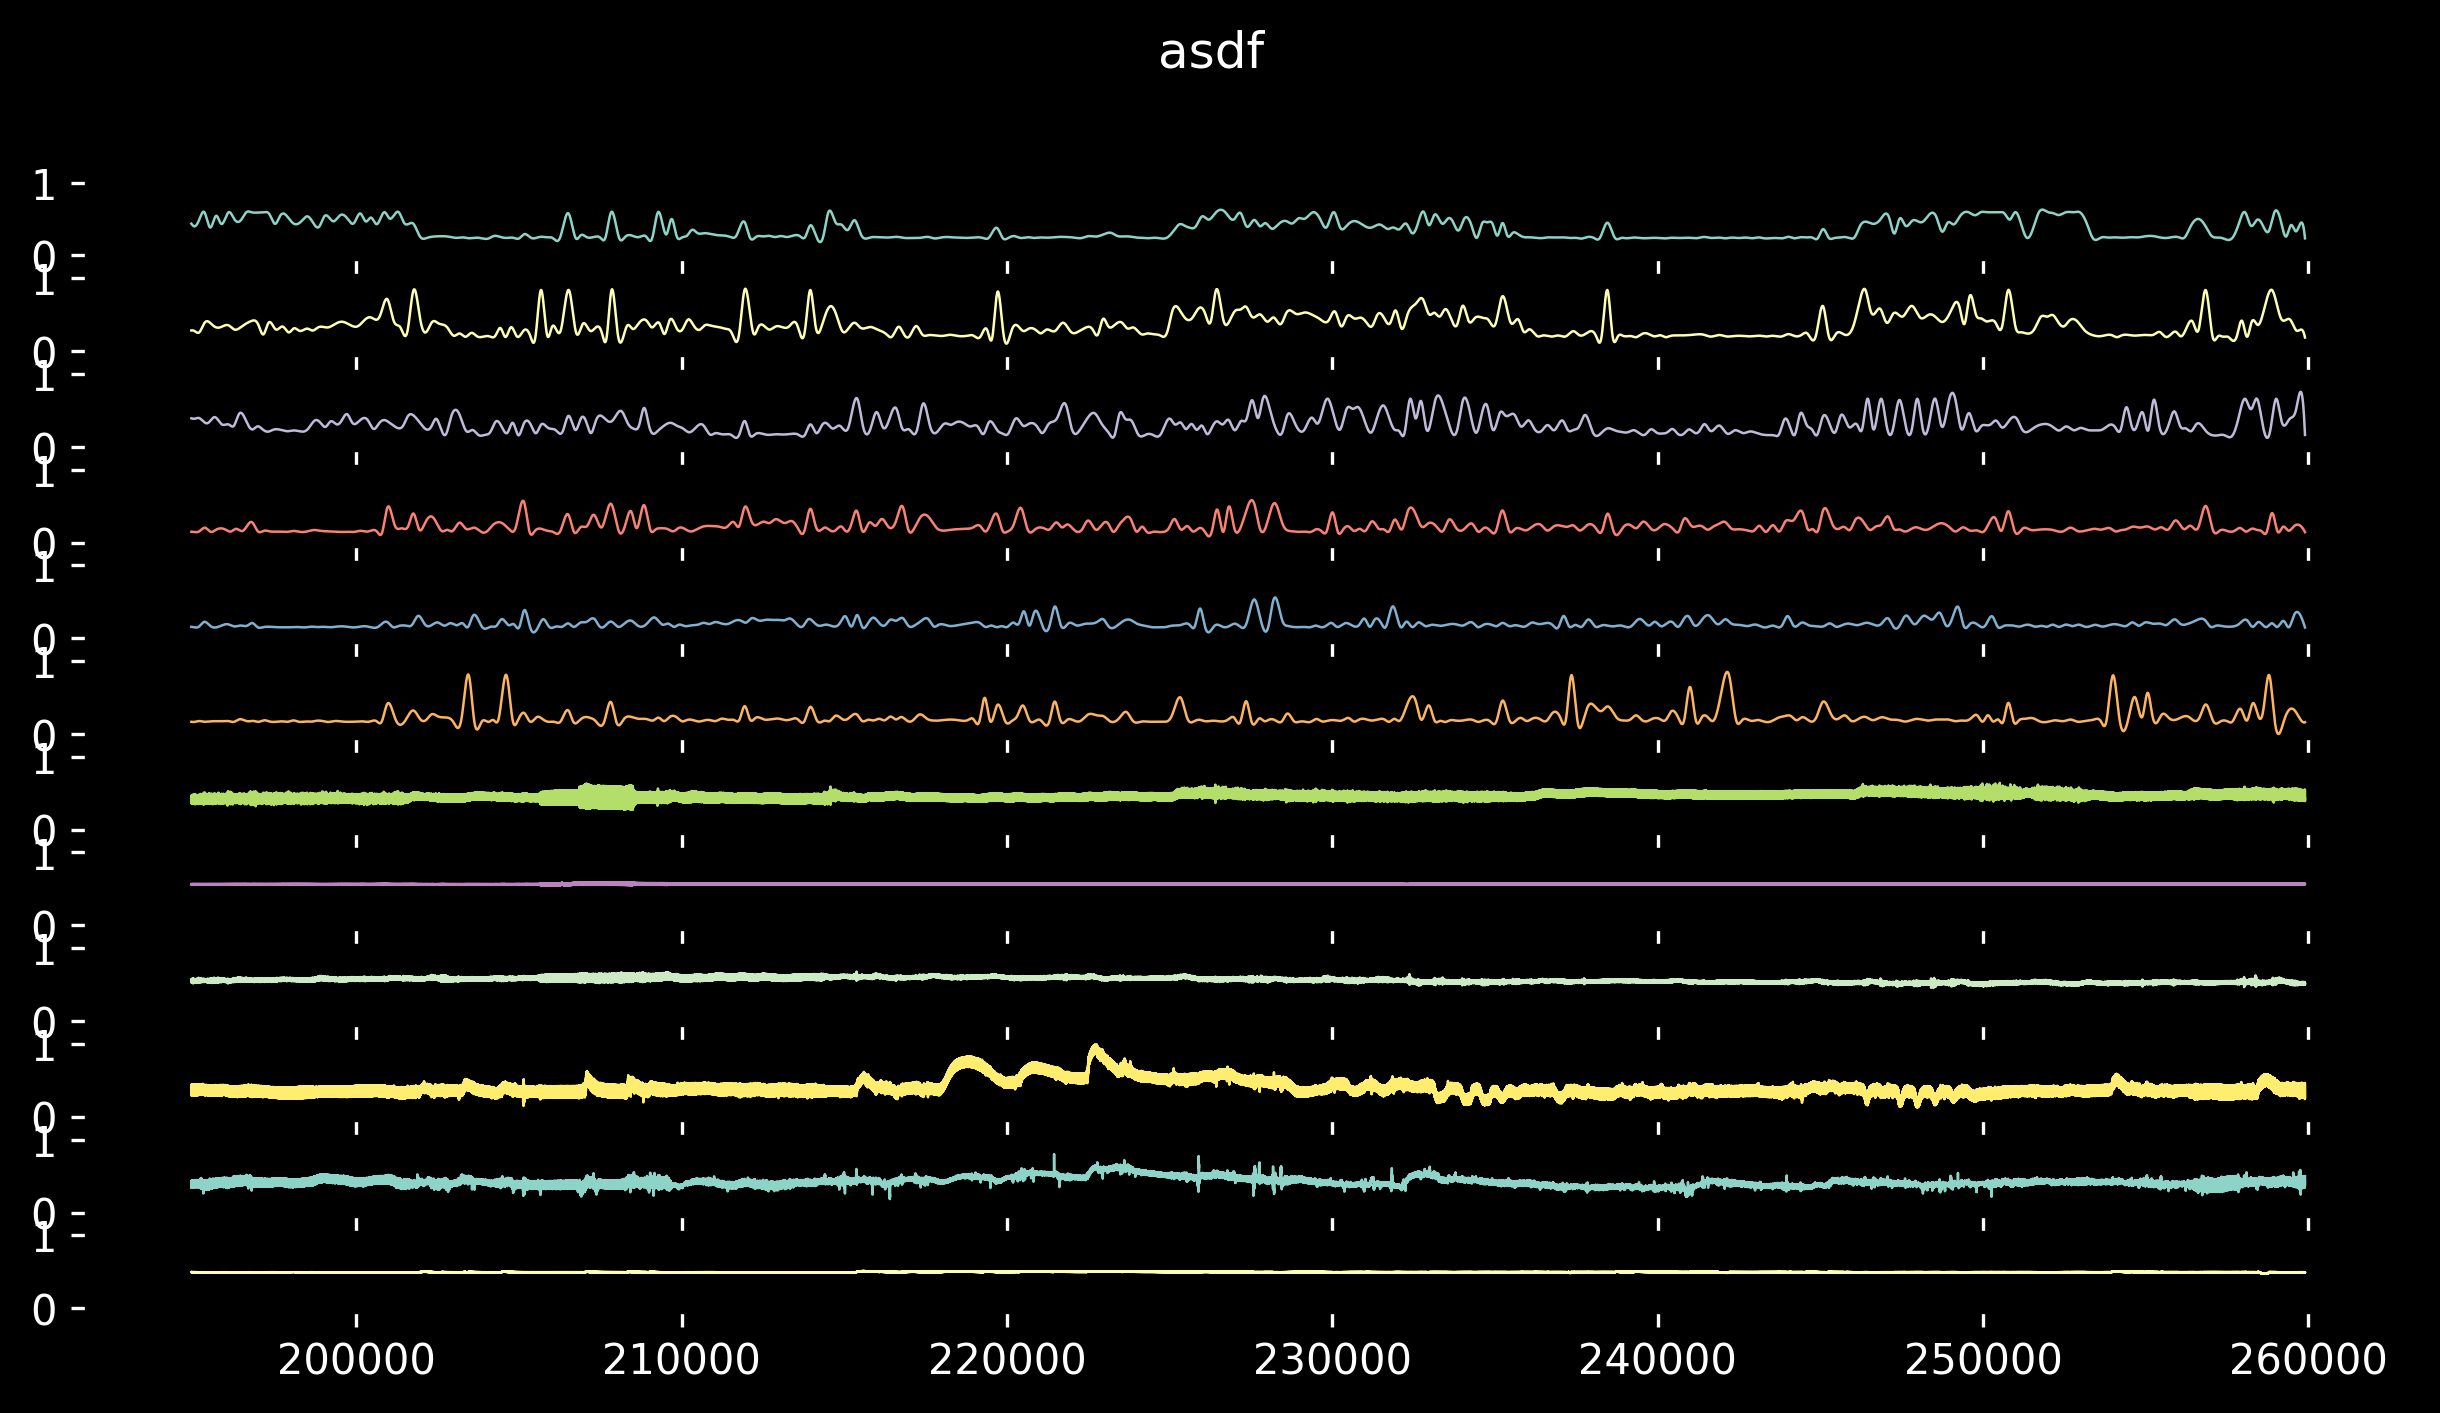

In [ ]:
#visualización

# plt.style.use('dark_background')
# plt.tick_params(top='off', bottom='off', left='off', right='off', labelleft='off', labelbottom='on')

index= np.arange(0,len(robi_df_escal_completo),1) #index=el rango que queremos visualizar
plt.rcParams["figure.dpi"] = 300 #calidad de imagen
plt.close('all')
plt.rcParams["axes.edgecolor"] = 'black' #calidad de imagen
plt.rcParams["legend.loc"] = 'right' #calidad de imagen


robi_df_escal_completo[194925:].plot(figsize=(10,5),linewidth=0.6,
                                     title='env+crudas',sharex=True, 
                                     sharey=True,legend=False,subplots=True)
#posición de los nombres
# plt.savefig('asdf.png') #guardamos
plt.show()

In [ ]:
# robi_df_escal_completo_and=robi_df_escal_completo
# robi_df_escal_completo_and['3 franjas']=robi_df['3 franjas']
# # display(robi_df_escal_completo_and)

In [ ]:
#Generamos un andrews plot 
# fig = plt.figure(figsize = (25, 8))
# pd.plotting.andrews_curves(robi_df_escal_completo_and,'3 franjas')
# plt.show()

In [ ]:
# #Generamos un grafico de coordenadas paralelas.
# fig = plt.figure(figsize = (25, 8))
# pd.plotting.parallel_coordinates(robi_df_escal_completo_and,'3 franjas')
# plt.show()

# 2 ROBI Arbol de decisión 2️⃣


## 2.1 Arbol de decisión sobre toda la data 

In [ ]:
%%time
from sklearn.tree import DecisionTreeClassifier

#dividimos el dataset en datos de entrenamiento y de prueba

x= robi_df_escal_completo
y= robi_df['3 franjas']
x_train, x_test ,y_train, y_test = train_test_split( x , y , random_state=0)

#entrenamos el modelo
dtc = DecisionTreeClassifier(max_features=None,class_weight='balanced').fit(x_train, y_train)

#Realizamos la prediccion:
y_pred = dtc.predict(x_test)

# Probamos accuracy:
print('accuracy =' , accuracy_score(y_test,y_pred))
print('precision = ' , precision_score(y_test,y_pred,average='macro'))

accuracy = 0.9646638758926372
precision=  0.9621384251017696
CPU times: user 6.33 s, sys: 15.7 ms, total: 6.35 s
Wall time: 7.04 s


In [ ]:
print(classification_report(y_test, y_pred, target_names=['0°-45°','45°-90°','90°-135°']))
plt.show()

              precision    recall  f1-score   support

      0°-45°       0.97      0.98      0.97     27993
     45°-90°       0.95      0.94      0.94     15192
    90°-135°       0.97      0.97      0.97     21791

    accuracy                           0.96     64976
   macro avg       0.96      0.96      0.96     64976
weighted avg       0.96      0.96      0.96     64976



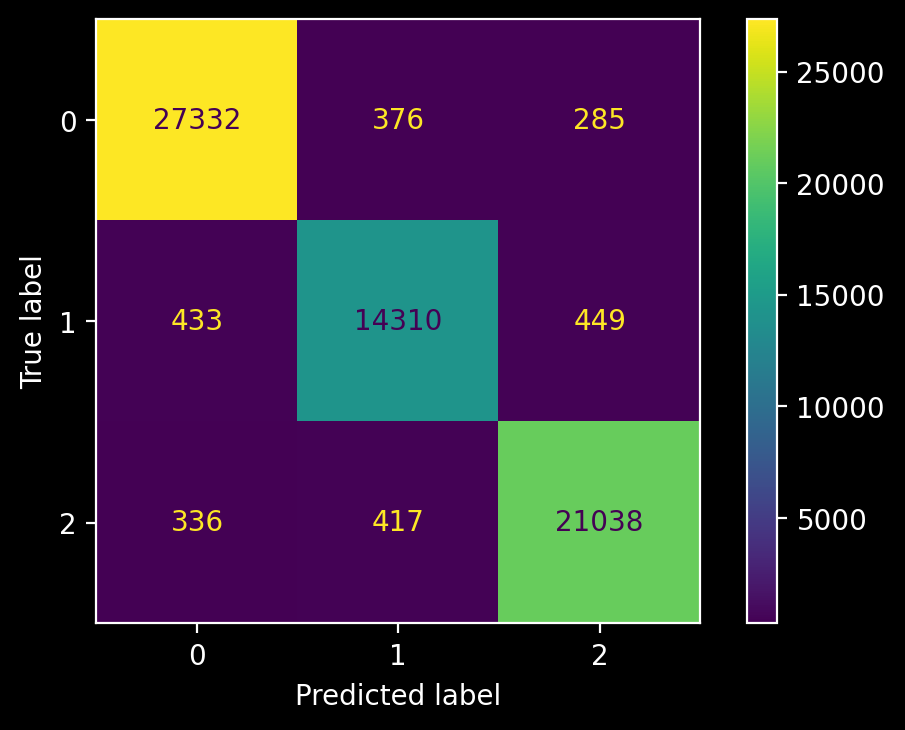

In [ ]:
#Realizamos la matriz de confusion.
matriz=confusion_matrix(y_test,y_pred)
plt.style.use('dark_background')
disp = ConfusionMatrixDisplay(confusion_matrix=matriz, display_labels=dtc.classes_)
disp.plot()
plt.show()

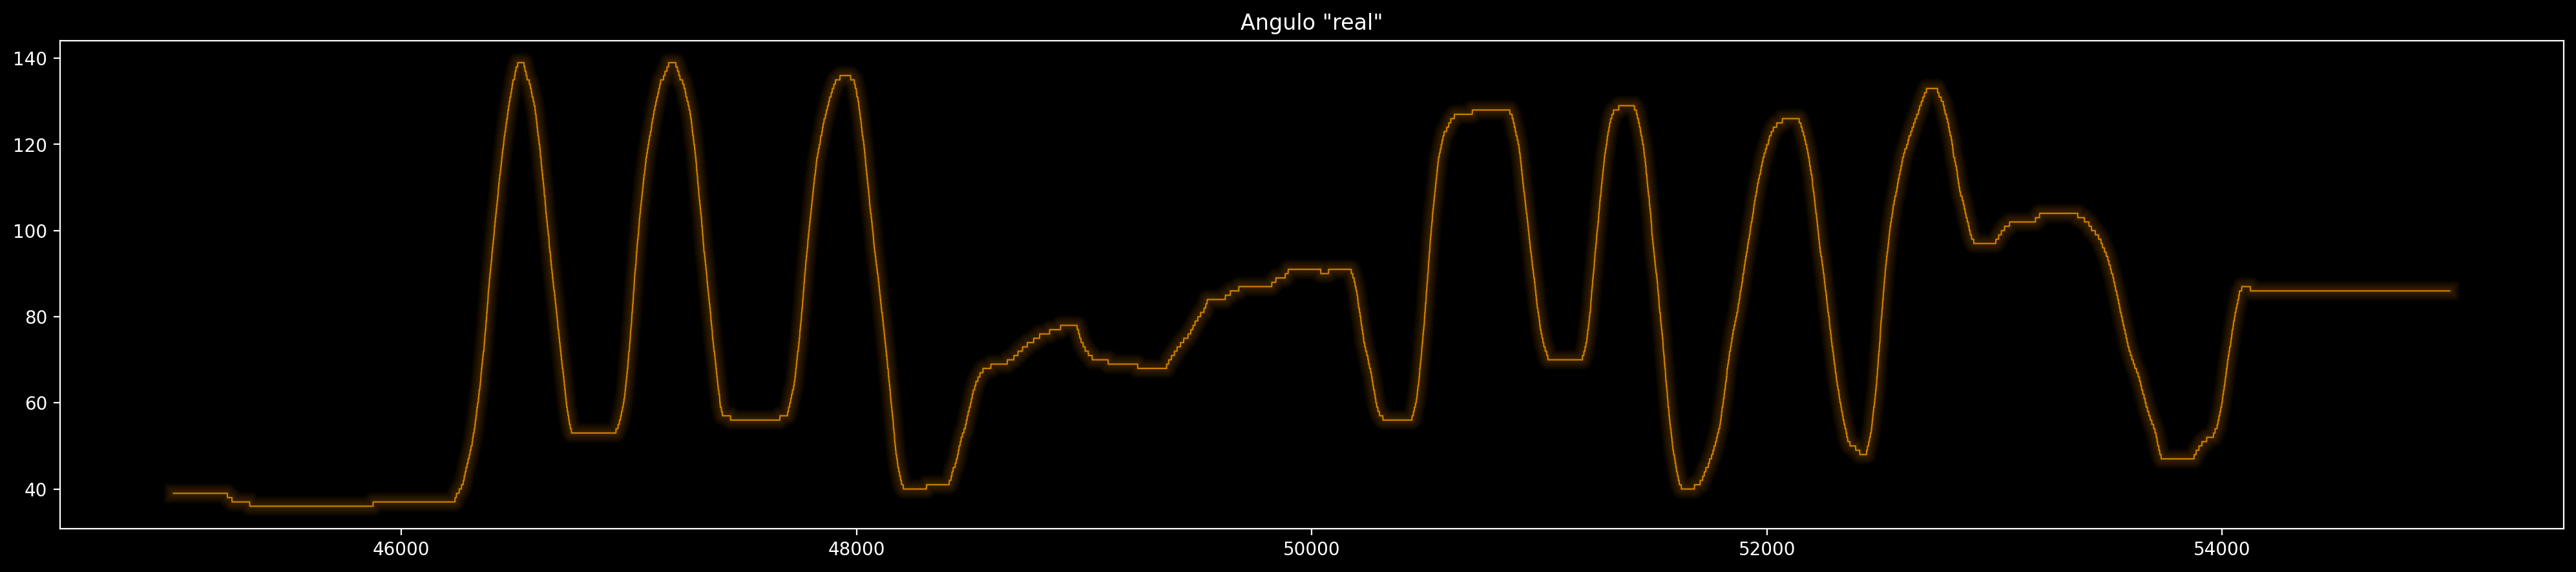

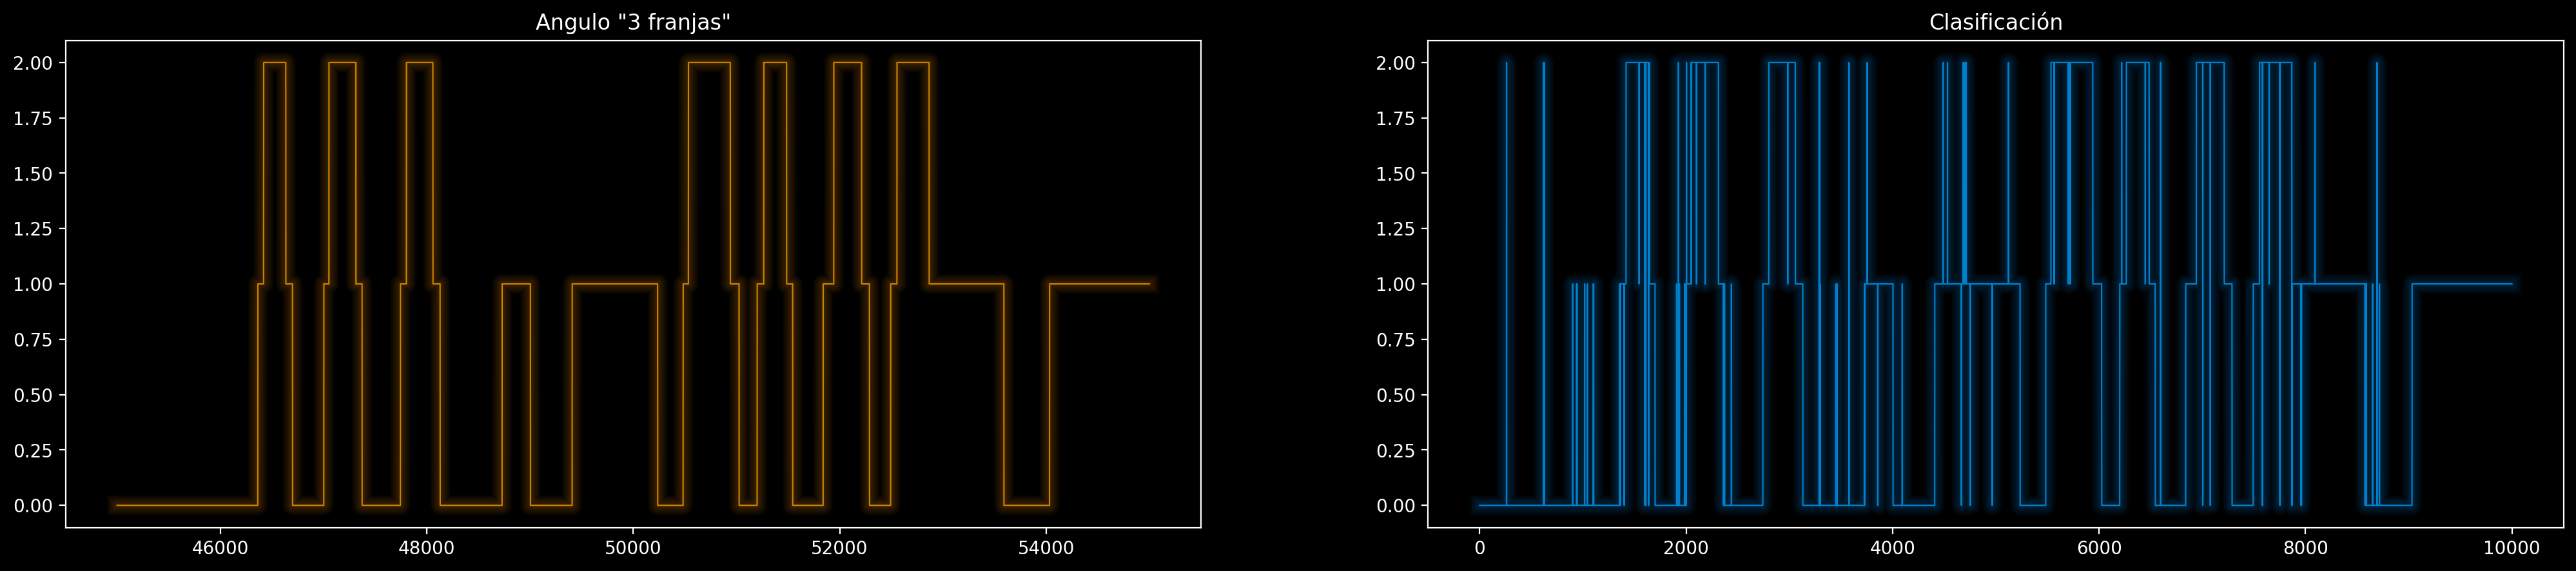

CPU times: user 1.64 s, sys: 24.1 ms, total: 1.66 s
Wall time: 1.66 s


In [ ]:
%%time
plt.rcParams["figure.dpi"] = 200
plt.figure(figsize=(25,5))

limi_i=45000
limi_s=55000

# plt.subplot(131)
plt.title('Angulo "real"')
plt.plot(robi_df['Angulo'][limi_i:limi_s],
         linewidth=0.8, color=(0.8,0.5,0,1))
mplcyberpunk.make_lines_glow()
plt.figure(figsize=(25,5))

plt.subplot(121)
plt.title('Angulo "3 franjas"')
plt.plot(robi_df['3 franjas'][limi_i:limi_s],
         linewidth=0.8, color=(0.8,0.5,0,1))
mplcyberpunk.make_lines_glow()

plt.subplot(122)
plt.title('Clasificación')
y_pred_randomforest=dtc.predict(x[limi_i:limi_s])
plt.plot(y_pred_randomforest,linewidth=0.8, color=(0,0.5,0.8,1))
mplcyberpunk.make_lines_glow()
plt.show()


In [ ]:
y_pred_randomforest[0]

0

In [ ]:
%%time
# Calculamos el tiempo de ejecución de una clasificación
robi_df_escal_completo[0:1]
display(robi_df_escal_completo[0:1])
prueba=np.array(robi_df_escal_completo[0:1])
prueba=prueba.reshape(-1, 1).transpose()
predic_prueba=dtc.predict(prueba)
predic_prueba
#En general da un resultado entre 21 y 24 ms.

,DeltMed,DeltFront,Biceps,Flex_Muñe,Flex_Dedos,Prona,can1raw,can2raw,can3raw,can4raw,can5raw,can6raw
0,0.247748,0.208665,0.178718,0.164989,0.168876,0.171864,0.259546,0.562185,0.635017,0.333882,0.749379,0.496714


CPU times: user 13.2 ms, sys: 1.99 ms, total: 15.2 ms
Wall time: 19.4 ms


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


Cálculo de las importancias de las caracteristicas (canales crudos y envolventes)

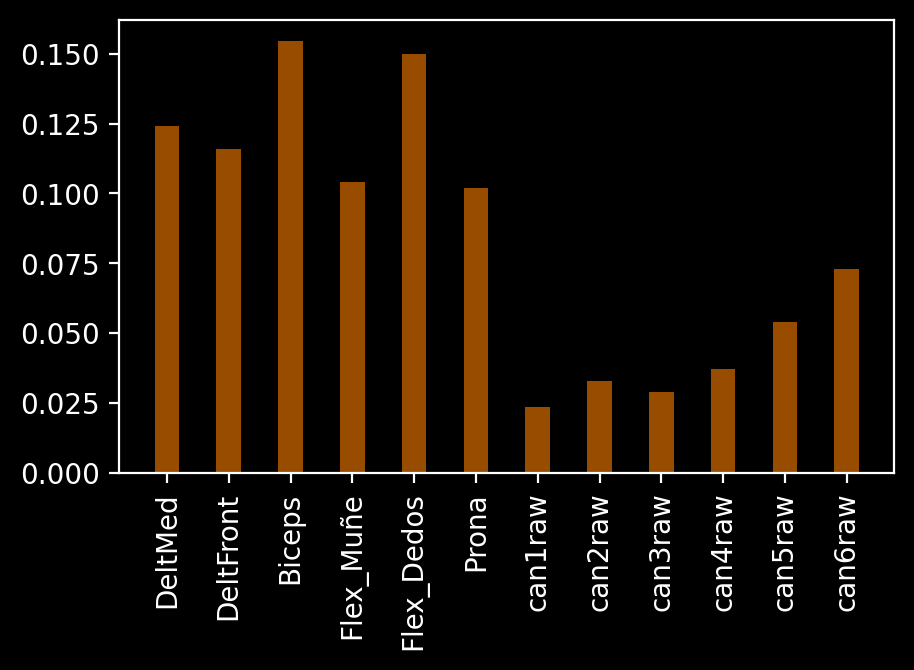

In [ ]:
import mplcyberpunk
# plt.style.use("cyberpunk")
# plt.style.use("dark_background")

importancias=dtc.feature_importances_
nombres =list((robi_df_escal_completo.columns).transpose())
plt.figure(figsize=(5,3))
# plt.grid()
# plt.plot(importancias, color=(1,0,0.8,1))
plt.bar(nombres,importancias, align='center', width=0.4, bottom=0, color=(1,0.5,0,0.6))
plt.xticks(rotation='vertical')
mplcyberpunk.make_lines_glow()
# mplcyberpunk.add_underglow()
# plt.ylim(1)
plt.show()

## 2.2 Arbol de decisión solo con señales crudas


In [ ]:
%%time
#dividimos el dataset en datos de entrenamiento y de prueba

x= robi_df_escal_crudo
y= robi_df['3 franjas']
x_train, x_test ,y_train, y_test = train_test_split( x , y , random_state=0)

#cargamos el modelo
# rfc = RandomForestClassifier()

#entrenamos el modelo
dtc_crudo = DecisionTreeClassifier(max_features=None,class_weight='balanced').fit(x_train, y_train)

#Realizamos la prediccion:
y_pred = dtc_crudo.predict(x_test)

# Probamos accuracy:
print('accuracy =' , accuracy_score(y_test,y_pred))
print('precision = ' , precision_score(y_test,y_pred,average='macro'))

accuracy = 0.8534074119674957
precision=  0.8414046767597707
CPU times: user 3.5 s, sys: 25.9 ms, total: 3.53 s
Wall time: 3.7 s


In [ ]:
print(classification_report(y_test, y_pred, target_names=['0°-45°','45°-90°','90°-135°']))
plt.show()

              precision    recall  f1-score   support

      0°-45°       0.89      0.90      0.89     27993
     45°-90°       0.77      0.77      0.77     15192
    90°-135°       0.86      0.86      0.86     21791

    accuracy                           0.85     64976
   macro avg       0.84      0.84      0.84     64976
weighted avg       0.85      0.85      0.85     64976



In [ ]:
plt.style.use('default')

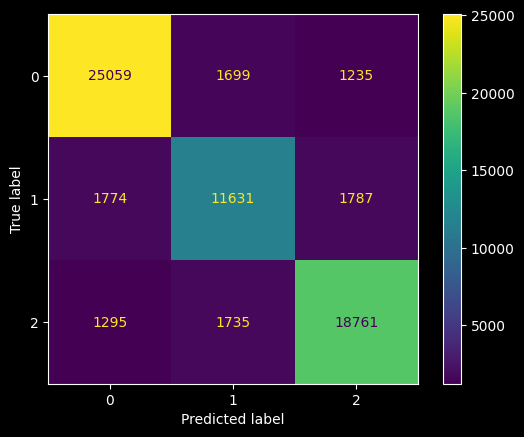

In [ ]:
#Realizamos la matriz de confusion.
plt.style.use('default')
matriz=confusion_matrix(y_test,y_pred)
plt.style.use('dark_background')

disp = ConfusionMatrixDisplay(confusion_matrix=matriz, display_labels=dtc_crudo.classes_)
disp.plot()
plt.show()



In [ ]:
%%time
plt.rcParams["figure.dpi"] = 1000
plt.figure(figsize=(20,7))

limi_i=45000
limi_s=55000

# # plt.subplot(131)
# plt.title('Angulo "real"')
# plt.plot(robi_df['Angulo'][limi_i:limi_s],linewidth=0.8, color=(0.8,0.5,0,1))
# mplcyberpunk.make_lines_glow()
# plt.figure(figsize=(25,5))

plt.subplot(121)
plt.title('Angulo "3 franjas"')
plt.plot(robi_df['3 franjas'][limi_i:limi_s],linewidth=0.8, color=(0.8,0.5,0,1))
mplcyberpunk.make_lines_glow()

plt.subplot(122)
plt.title('Clasificación')
y_pred_randomforest=dtc_crudo.predict(x[limi_i:limi_s])
plt.plot(y_pred_randomforest,linewidth=0.8, color=(0,0.5,0.8,1))
mplcyberpunk.make_lines_glow()
plt.show()



CPU times: user 21.5 s, sys: 517 ms, total: 22.1 s
Wall time: 22 s


In [ ]:
y_pred_randomforest[0]

0

In [ ]:
%%time
# Calculamos el tiempo de ejecución de una clasificación
robi_df_escal_crudo[0:1]
display(robi_df_escal_crudo[0:1])
prueba=np.array(robi_df_escal_crudo[0:1])
prueba=prueba.reshape(-1, 1).transpose()
predic_prueba=dtc_crudo.predict(prueba)
predic_prueba
#En general da un resultado entre 21 y 24 ms.

,can1raw,can2raw,can3raw,can4raw,can5raw,can6raw
0,0.259546,0.562185,0.635017,0.333882,0.749379,0.496714


CPU times: user 8.58 ms, sys: 1.01 ms, total: 9.59 ms
Wall time: 8.83 ms


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


Cálculo de las importancias de las caracteristicas (canales crudos y envolventes)

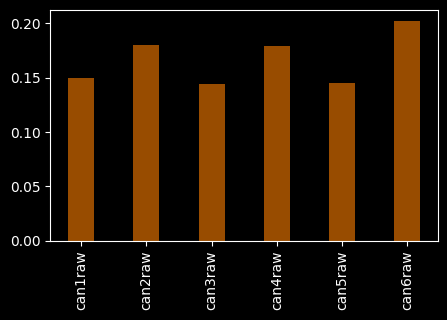

In [ ]:
import mplcyberpunk
# plt.style.use("cyberpunk")
plt.style.use("default")
plt.style.use("dark_background")


importancias=dtc_crudo.feature_importances_
nombres =list((robi_df_escal_crudo.columns).transpose())
plt.figure(figsize=(5,3))
# plt.grid()
# plt.plot(importancias, color=(1,0,0.8,1))
plt.bar(nombres,importancias, align='center', width=0.4, bottom=0, color=(1,0.5,0,0.6))
plt.xticks(rotation='vertical')
mplcyberpunk.make_lines_glow()
# mplcyberpunk.add_underglow()
# plt.ylim(1)
plt.show()

## 2.3 Arbol de decisión solo con señales envolventes


In [ ]:
%%time
#dividimos el dataset en datos de entrenamiento y de prueba

x= robi_df_escal_env
y= robi_df['3 franjas']
x_train, x_test ,y_train, y_test = train_test_split( x , y , random_state=0)

#cargamos el modelo
# rfc = RandomForestClassifier()

#entrenamos el modelo
rfc_env = DecisionTreeClassifier(max_features=None, class_weight='balanced').fit(x_train, y_train)

#Realizamos la prediccion:
y_pred = rfc_env.predict(x_test)

# Probamos accuracy:
print('accuracy =' , accuracy_score(y_test,y_pred))
print('precision = ' , precision_score(y_test,y_pred,average='macro'))

accuracy = 0.9857793646885004
precision=  0.9851991377122774
CPU times: user 3.5 s, sys: 11.7 ms, total: 3.52 s
Wall time: 3.64 s


In [ ]:
print(classification_report(y_test, y_pred, target_names=['0°-45°','45°-90°','90°-135°']))
plt.show()

              precision    recall  f1-score   support

      0°-45°       0.99      0.99      0.99     27993
     45°-90°       0.98      0.98      0.98     15192
    90°-135°       0.99      0.99      0.99     21791

    accuracy                           0.99     64976
   macro avg       0.99      0.98      0.98     64976
weighted avg       0.99      0.99      0.99     64976



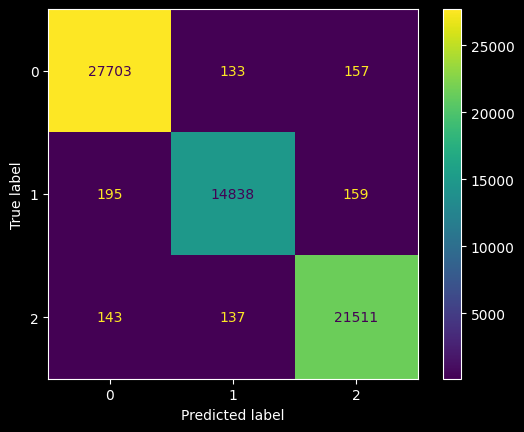

In [ ]:
#Realizamos la matriz de confusion.
matriz=confusion_matrix(y_test,y_pred)
plt.style.use('dark_background')

disp = ConfusionMatrixDisplay(confusion_matrix=matriz, display_labels=rfc_env.classes_)
disp.plot()
plt.show()



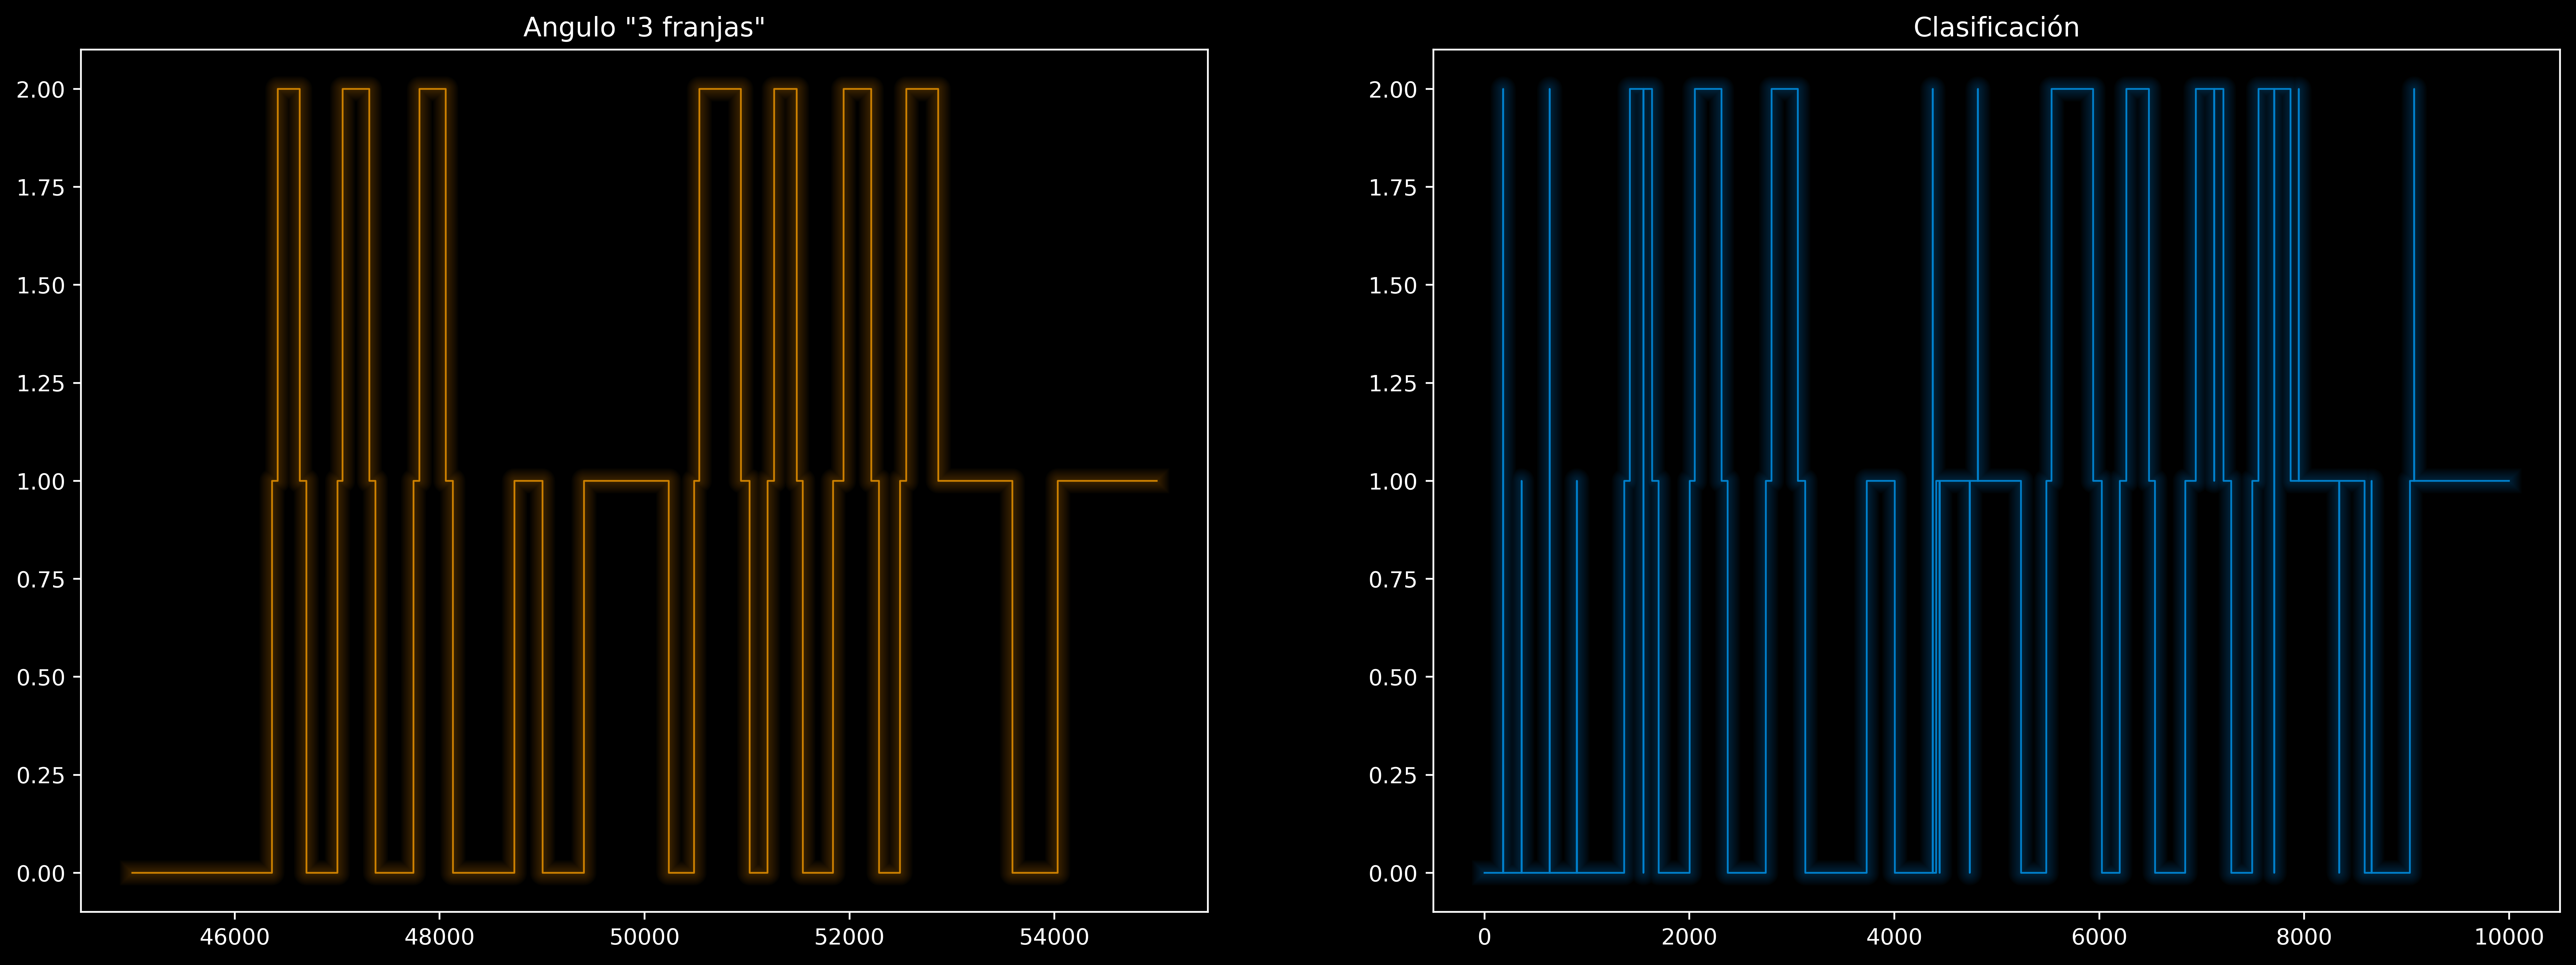

CPU times: user 4.05 s, sys: 113 ms, total: 4.16 s
Wall time: 4.15 s


In [ ]:
%%time
plt.rcParams["figure.dpi"] = 500
plt.figure(figsize=(20,7))

limi_i=45000
limi_s=55000

# plt.subplot(131)
# plt.title('Angulo "real"')
# plt.plot(robi_df['Angulo'][limi_i:limi_s],linewidth=0.8, color=(0.8,0.5,0,1))
# mplcyberpunk.make_lines_glow()
# plt.figure(figsize=(25,5))

plt.subplot(121)
plt.title('Angulo "3 franjas"')
plt.plot(robi_df['3 franjas'][limi_i:limi_s],linewidth=0.8, color=(0.8,0.5,0,1))
mplcyberpunk.make_lines_glow()

plt.subplot(122)
plt.title('Clasificación')
y_pred_randomforest=rfc_env.predict(x[limi_i:limi_s])
plt.plot(y_pred_randomforest,linewidth=0.8, color=(0,0.5,0.8,1))
mplcyberpunk.make_lines_glow()
plt.show()




In [ ]:
y_pred_randomforest[0]

0

In [ ]:
%%time
# Calculamos el tiempo de ejecución de una clasificación
robi_df_escal_env[0:1]
display(robi_df_escal_env[0:1])
prueba=np.array(robi_df_escal_env[0:1])
prueba=prueba.reshape(-1, 1).transpose()
predic_prueba=rfc_env.predict(prueba)
display(predic_prueba)
#En general da un resultado entre 21 y 24 ms.

,DeltMed,DeltFront,Biceps,Flex_Muñe,Flex_Dedos,Prona
0,0.247748,0.208665,0.178718,0.164989,0.168876,0.171864


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


array([0])

CPU times: user 16.2 ms, sys: 990 µs, total: 17.2 ms
Wall time: 17.7 ms


Cálculo de las importancias de las caracteristicas (canales crudos y envolventes)

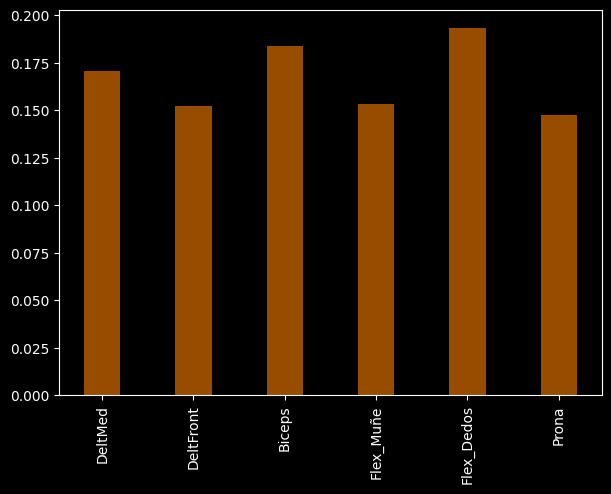

In [ ]:
import mplcyberpunk
# plt.style.use("cyberpunk")
plt.style.use("default")
plt.style.use("dark_background")

importancias=rfc_env.feature_importances_
nombres =list((robi_df_escal_env.columns).transpose())
plt.figure(figsize=(7,5))
# plt.grid()
# plt.plot(importancias, color=(1,0,0.8,1))
plt.bar(nombres,importancias, align='center', width=0.4, bottom=0, color=(1,0.5,0,0.6))
plt.xticks(rotation='vertical')
# mplcyberpunk.make_lines_glow()
# mplcyberpunk.add_underglow()
# plt.ylim(0.01)
plt.show()

## 2.4 Grid search Arbol de decisión 

In [ ]:
#Numero de caracteristicas a considerar en cada split
max_features = ['auto','log2']
#Profundidad del Arbol
max_depth = [10,20]
#Cantidad minima de ejemplos para separar un nodo
min_samples_split = [2,5]
#Criterio
criterion =['gini', 'entropy']
min_samples_leaf=[1,2]


In [ ]:
#Generamos una grilla de parametros usando diccionario
param_grid= {

    'max_features': max_features ,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'criterion' : criterion,
    'min_samples_leaf':min_samples_leaf
    }

print(param_grid)

{'n_estimators': [80, 93, 106, 120], 'max_features': ['auto', 'log2'], 'max_depth': [10, 20], 'min_samples_split': [2, 5], 'criterion': ['gini', 'entropy'], 'min_samples_leaf': [1, 2]}


In [ ]:
# Inicializamos un nuevo RF
rf=DecisionTreeClassifier()
from sklearn.model_selection import GridSearchCV
rf_Grid= GridSearchCV(estimator = rf, param_grid= param_grid , cv= 3 , verbose= 2, n_jobs= 4)

In [ ]:
%%time
rf_Grid.fit(x_train,y_train)

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 7.39 µs


In [ ]:
y_pred_final_grid=rf_Grid.predict(x_test)

# Probamos accuracy:
print('accuracy =' , accuracy_score(y_test,y_pred_final_grid))
print('precision = ' , precision_score(y_test,y_pred_final_grid,average='macro'))

#Metricas varias
print(classification_report(y_test, y_pred_final_grid, target_names=['0°-45°','45°-90°','90°-135°']))
plt.show()

#Realizamos la matriz de confusion.
matriz=confusion_matrix(y_test,y_pred_final_grid)

disp = ConfusionMatrixDisplay(confusion_matrix=matriz, display_labels=rf_Grid.classes_)
disp.plot()
plt.show()

In [ ]:
import joblib
# #guardamos modelo
# joblib.dump(rf_Grid, '/content/drive/MyDrive/5. Robi/Algoritmos Robi/rf_grid_envolventes.pkl')
# #cargamos modelo
# svR=joblib.load('C:/Users/Facu/PycharmProjects/EMGROBI/ROBI_IA/svR_entrenado.pkl')
print('Ok')


In [ ]:
# datos desbalanceados
# robi_df.groupby('3 franjas').count()
